# Time_Series_Mini_Project_4

### Project Brief Time Series - Furniture Sales Forecast

### Furniture Sales Forecast

Every business owner’s objective is to estimate the future trends – in terms of sales, profits, gains etc.   To do this analysis, the owner first has to segregate the data by category and analyze each entity separately. For each entity, a forecast can be estimated based on the past sales of that entity. The idea behind this is to find out the popularity of a certain product and how its sales can impact the business.

Every product category is unique and cater to different customer base. So the analysis cannot be generalized that one trend is applicable to all products. A thorough insight into the past performance will reveal a lot of components that will enable the business to identify the trends.


### Business Objective

●Build a forecast model to predict the furniture sales of a certain store


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller,acf,pacf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from pandas.tseries.offsets import DateOffset
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima


In [2]:
store_df = pd.read_excel('DS3_C6_S4_TimeSeries_Sales_Data_Project.xls', parse_dates=['Order Date'])
store_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [3]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [4]:
store_df.shape

(9994, 21)

In [5]:
store_df.columns.values

array(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City',
       'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'], dtype=object)

In [6]:
store_df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
store_df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
store_df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [9]:
df=store_df.copy()

In [10]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [11]:
fur = df.loc[df['Category'] == 'Furniture']

In [12]:
off=df.loc[df['Category'] == 'Office Supplies']

In [13]:
tech=df.loc[df['Category'] == 'Technology']

-----------------------------------------------------------------------------------------------------------------------------------------------

## Office Supplies

In [14]:
off

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,9983,US-2016-157728,2016-09-22,2016-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,...,49505,Central,OFF-PA-10002195,Office Supplies,Paper,"RSVP Cards & Envelopes, Blank White, 8-1/2"" X ...",35.560,7,0.0,16.7132
9984,9985,CA-2015-100251,2015-05-17,2015-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,31.500,10,0.0,15.1200
9985,9986,CA-2015-100251,2015-05-17,2015-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-SU-10000898,Office Supplies,Supplies,Acme Hot Forged Carbon Steel Scissors with Nic...,55.600,4,0.0,16.1240
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200


In [15]:
office_supplies = off[['Order Date','Sales']]
office_supplies.head()

,Order Date,Sales
2,2016-06-12,14.620
4,2015-10-11,22.368
6,2014-06-09,7.280
8,2014-06-09,18.504
9,2014-06-09,114.900


In [16]:
office_supplies = office_supplies.sort_values('Order Date')
office_supplies = office_supplies.groupby('Order Date')['Sales'].sum().reset_index()
office_supplies.tail(50)

,Order Date,Sales
1098,2017-11-08,109.900
1099,2017-11-09,2250.720
1100,2017-11-10,1444.828
1101,2017-11-11,1656.194
1102,2017-11-12,1375.124
1103,2017-11-13,1971.528
1104,2017-11-14,225.198
1105,2017-11-16,1225.466
1106,2017-11-17,1722.210
1107,2017-11-18,1109.320


In [17]:
office_supplies = office_supplies.set_index('Order Date')
office_supplies

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536
2014-01-06,685.340
2014-01-07,10.430
...,...
2017-12-26,814.594
2017-12-27,13.248
2017-12-28,1091.244


In [18]:
office_supplies.shape

(1148, 1)

In [19]:
office_monthly = office_supplies['Sales'].resample('M').mean()

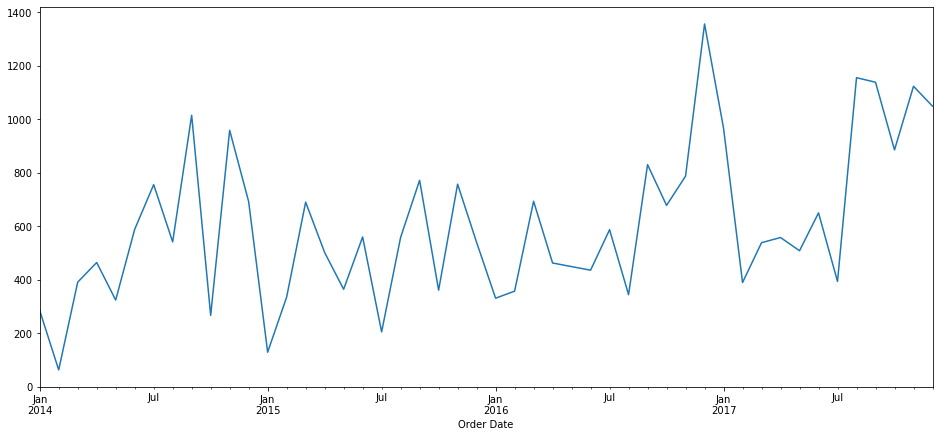

In [20]:
office_monthly.plot(figsize = (16, 7))
plt.show()

Dec 2017 has High Sales for Office Supplies

In [21]:
office_monthly=pd.DataFrame(office_monthly)
office_monthly.shape

(48, 1)

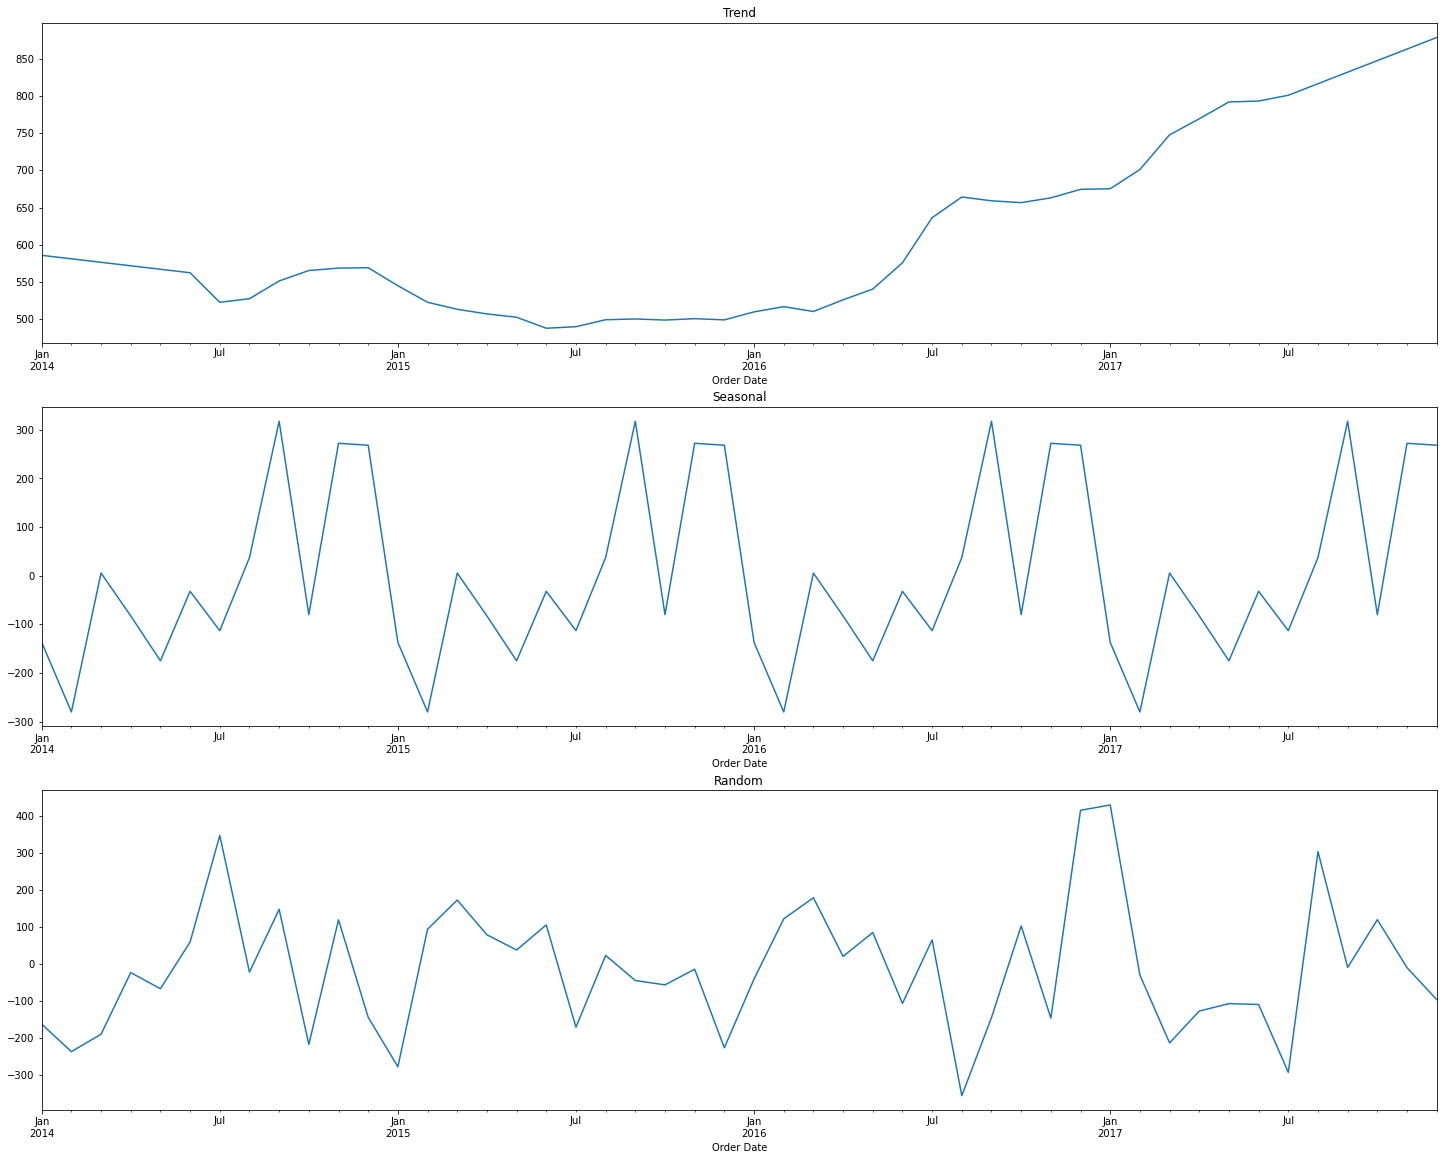

In [22]:
fig,ax = plt.subplots(3,1,figsize=(25,20))

result = seasonal_decompose(office_monthly, period=12, extrapolate_trend='freq')

# result.trend.plot(figsize=(8,6),ax=ax[0])
result.trend.plot(ax=ax[0])
ax[0].set_title("Trend")

result.seasonal.plot(ax=ax[1])
ax[1].set_title("Seasonal")

result.resid.plot(ax=ax[2])
ax[2].set_title("Random")
plt.show()

There is Trend and Seasonality, so will move for SARIMA Model

### Stationarity Check

In [23]:
def checkStationarity(office_monthly):
    pvalue = adfuller(office_monthly)[1]

    if pvalue < 0.05:
        msg = "pvalue={}. Data is Stationary. Proceed to model building".format(pvalue)
    else:
        msg = "pvalue={}. Data is not Stationary. Make the data stationary before model building".format(pvalue)

    return(msg)

In [24]:
checkStationarity(office_monthly)

'pvalue=9.801371572373162e-05. Data is Stationary. Proceed to model building'

### Plot ACF and PACF

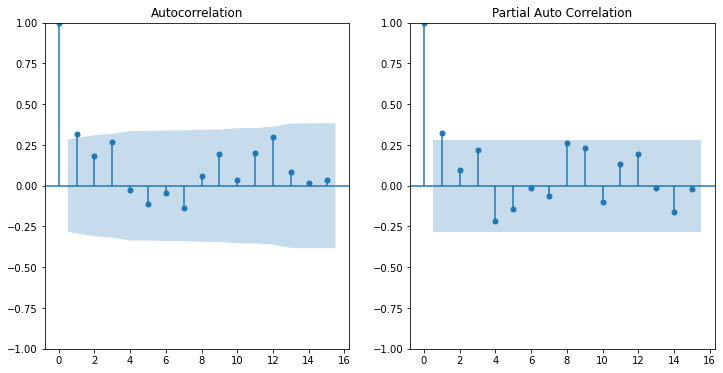

In [25]:
# ACF and PACF plots
ROWS = 1; COLS = 2
fig,ax = plt.subplots(ROWS,COLS,figsize=(12,6))
plot_acf(office_monthly, lags=15, ax=ax[0])
plt.title("Auto Correlation")

plot_pacf(office_monthly, lags=15, ax=ax[1])
plt.title("Partial Auto Correlation")

plt.show()

### Splitting

In [26]:
ss = int(0.70 * len(office_monthly))
train = office_monthly.iloc[:ss]
test = office_monthly.iloc[ss:]
print("train = {}, test = {}".format(len(train), len(test)))

train = 33, test = 15


### Defining p and q values

In [27]:
m1 = auto_arima(office_monthly,start_p=0,max_p=12,d=0, start_q=0,max_q=12, seasonal=True, trace=True)
print(m1.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=683.495, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=680.118, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=680.957, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=762.228, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=681.424, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=680.558, Time=0.31 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=682.486, Time=0.40 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=695.520, Time=0.09 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.341 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -337.059
Date:                Mon, 14 Nov 2022   AIC                            680.118
Time:                        10:57:32   BIC 

Taking p=1 and q=0

## Model

In [86]:
AIC=[]
BIC=[]
MSE=[]
RMSE=[]


start = len(train) 
end = len(train) + 11
p=1; q=1
m1 = sm.tsa.statespace.SARIMAX(train['Sales'],order=(p,0,q),seasonal_order=(p,0,q,12)).fit()
fcast=m1.fittedvalues
AIC.append(m1.aic)
BIC.append(m1.bic)
MSE.append(mean_squared_error(train,fcast))
RMSE.append(np.sqrt(MSE))


print(m1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   33
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -230.789
Date:                            Mon, 14 Nov 2022   AIC                            471.579
Time:                                    11:13:14   BIC                            479.061
Sample:                                01-31-2014   HQIC                           474.096
                                     - 09-30-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9973      0.029     34.738      0.000       0.941       1.054
ma.L1         -0.9693      0.296   

In [87]:
# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(m1.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


In [88]:
fcast_off=m1.predict(start,end,typ='levels')

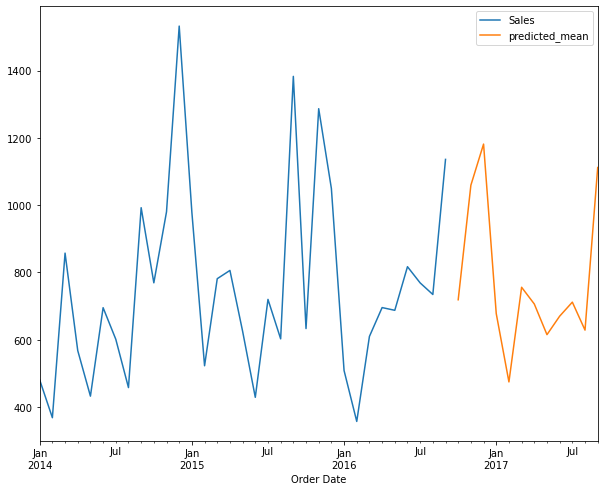

In [89]:
train['Sales'].plot(figsize=(10,8),legend=True)
fcast_off.plot(legend=True)


plt.show()

----------------------------------------------------------------------------------------------------------------------------------

## TECHNOLOGY

In [32]:
tech

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
11,12,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.424,4,0.2,68.3568
19,20,CA-2014-143336,2014-08-27,2014-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,94109,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,3,0.2,16.0110
26,27,CA-2016-121755,2016-01-16,2016-01-20,Second Class,EH-13945,Eric Hoffmann,Consumer,United States,Los Angeles,...,90049,West,TEC-AC-10003027,Technology,Accessories,Imation 8GB Mini TravelDrive USB 2.0 Flash Drive,90.570,3,0.0,11.7741
35,36,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7,0.2,123.4737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9983,9984,US-2016-157728,2016-09-22,2016-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,...,49505,Central,TEC-PH-10001305,Technology,Phones,Panasonic KX TS208W Corded phone,97.980,2,0.0,27.4344
9986,9987,CA-2016-125794,2016-09-29,2016-10-03,Standard Class,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,...,90008,West,TEC-AC-10003399,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.240,1,0.0,15.2208
9987,9988,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-AC-10001539,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,79.990,1,0.0,28.7964
9988,9989,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470


In [33]:
office_supplies1 = tech[['Order Date','Sales']]
office_supplies1.head()

,Order Date,Sales
7,2014-06-09,907.152
11,2014-06-09,911.424
19,2014-08-27,213.480
26,2016-01-16,90.570
35,2016-12-08,1097.544


In [34]:
office_supplies1 = office_supplies1.sort_values('Order Date')
office_supplies1 = office_supplies1.groupby('Order Date')['Sales'].sum().reset_index()
office_supplies1.head(50)

,Order Date,Sales
0,2014-01-06,1147.940
1,2014-01-09,31.200
2,2014-01-13,646.740
3,2014-01-15,149.950
4,2014-01-16,124.200
5,2014-01-20,699.930
6,2014-01-26,343.330
7,2014-02-01,468.900
8,2014-02-02,180.960
9,2014-02-06,306.560


In [35]:
office_supplies1 = office_supplies1.set_index('Order Date')
office_supplies1

,Sales
Order Date,
2014-01-06,1147.940
2014-01-09,31.200
2014-01-13,646.740
2014-01-15,149.950
2014-01-16,124.200
...,...
2017-12-25,401.208
2017-12-27,164.388
2017-12-28,14.850


In [36]:
office_supplies1.shape

(824, 1)

In [37]:
office_monthly1 = office_supplies1['Sales'].resample('M').mean()

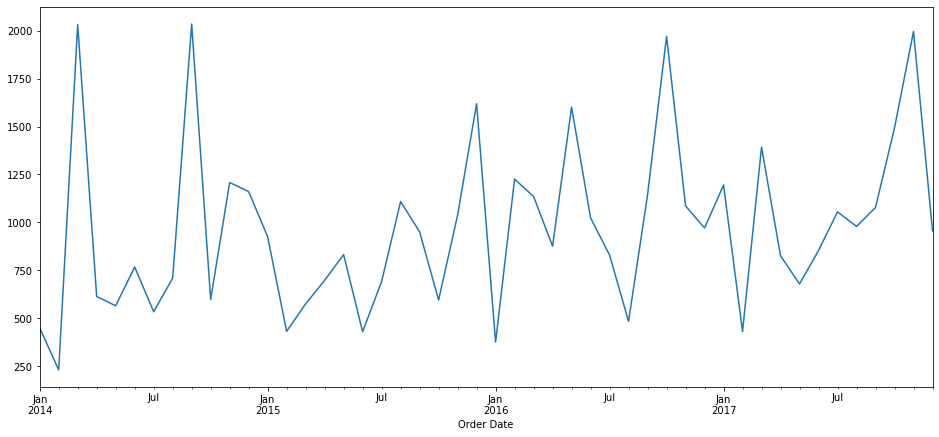

In [38]:
office_monthly1.plot(figsize = (16, 7))
plt.show()

High Sales for Technology is in month of March 2014,July 2014 and November 2017

In [39]:
office_monthly1=pd.DataFrame(office_monthly1)
office_monthly1.shape

(48, 1)

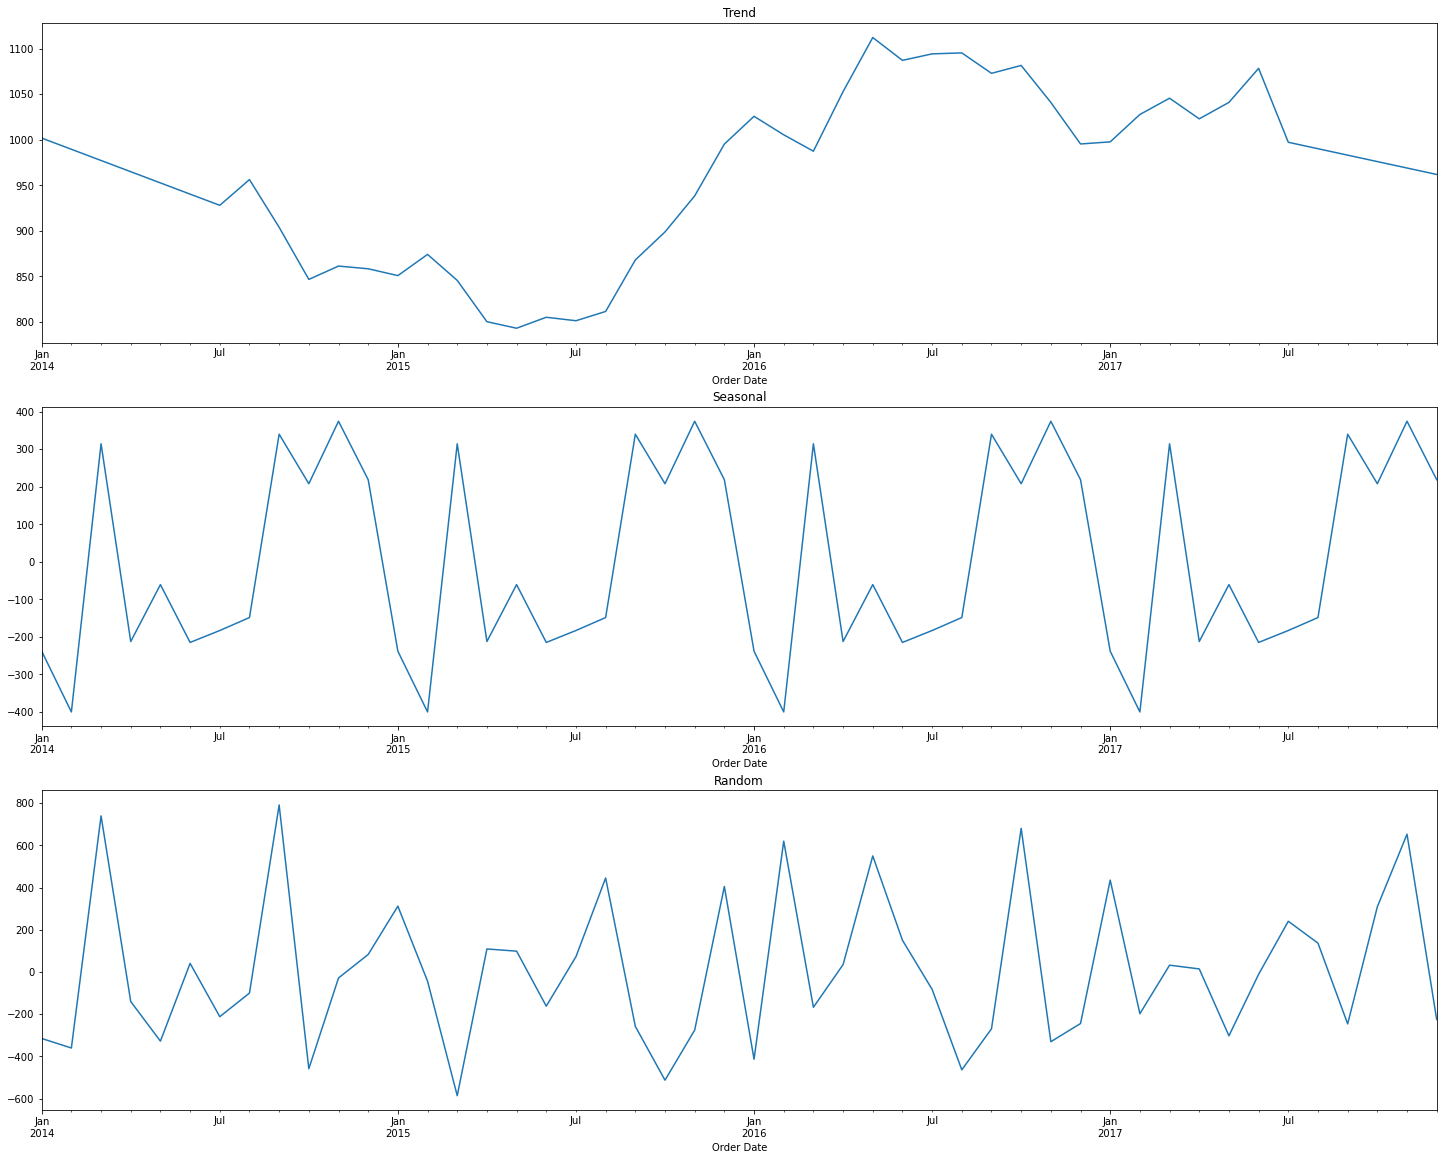

In [40]:
fig,ax = plt.subplots(3,1,figsize=(25,20))

result = seasonal_decompose(office_monthly1, period=12, extrapolate_trend='freq')

# result.trend.plot(figsize=(8,6),ax=ax[0])
result.trend.plot(ax=ax[0])
ax[0].set_title("Trend")

result.seasonal.plot(ax=ax[1])
ax[1].set_title("Seasonal")

result.resid.plot(ax=ax[2])
ax[2].set_title("Random")
plt.show()

There is Trend and Seasonality, so will move for SARIMA Model

### Stationarity Check

In [41]:
def checkStationarity(office_monthly1):
    pvalue = adfuller(office_monthly1)[1]

    if pvalue < 0.05:
        msg = "pvalue={}. Data is Stationary. Proceed to model building".format(pvalue)
    else:
        msg = "pvalue={}. Data is not Stationary. Make the data stationary before model building".format(pvalue)

    return(msg)

In [42]:
checkStationarity(office_monthly1)

'pvalue=2.5473335960274205e-10. Data is Stationary. Proceed to model building'

### Plot ACF and PACF

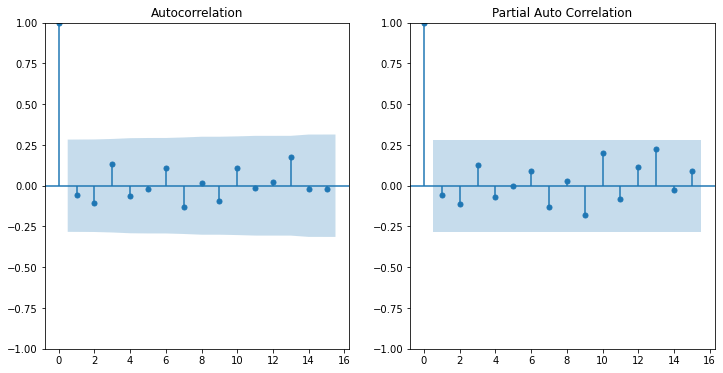

In [43]:
# ACF and PACF plots
ROWS = 1; COLS = 2
fig,ax = plt.subplots(ROWS,COLS,figsize=(12,6))
plot_acf(office_monthly1, lags=15, ax=ax[0])
plt.title("Auto Correlation")

plot_pacf(office_monthly1, lags=15, ax=ax[1])
plt.title("Partial Auto Correlation")

plt.show()

### Splitting

In [44]:
ss = int(0.70 * len(office_monthly))
train = office_monthly1.iloc[:ss]
test = office_monthly1.iloc[ss:]
print("train = {}, test = {}".format(len(train), len(test)))

train = 33, test = 15


### Defining p and q values

In [45]:
m2 = auto_arima(office_monthly1,start_p=0,max_p=12,d=0, start_q=0,max_q=12, seasonal=True, trace=True)
print(m2.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=725.877, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=727.740, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=727.697, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=807.454, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=729.641, Time=0.13 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.331 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   48
Model:                        SARIMAX   Log Likelihood                -360.939
Date:                Mon, 14 Nov 2022   AIC                            725.877
Time:                        10:57:37   BIC                            729.620
Sample:                    01-31-2014   HQIC                           727.291
                         - 12-31-2017                                         
Co

## Model

In [46]:
AIC1=[]
BIC1=[]
MSE1=[]
RMSE1=[]


start = len(train) 
end = len(train) + 11
p=1; q=1
m2 = sm.tsa.statespace.SARIMAX(train['Sales'],order=(p,0,q),seasonal_order=(p,0,q,12)).fit()
fcast2=m2.fittedvalues
AIC1.append(m2.aic)
BIC1.append(m2.bic)
MSE1.append(mean_squared_error(train,fcast2))
RMSE1.append(np.sqrt(MSE1))


print(m2.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   33
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -250.373
Date:                            Mon, 14 Nov 2022   AIC                            510.746
Time:                                    10:57:37   BIC                            518.228
Sample:                                01-31-2014   HQIC                           513.264
                                     - 09-30-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9991      0.042     24.017      0.000       0.918       1.081
ma.L1         -0.9803      0.679   

In [47]:
# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(m2.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


In [48]:
fcast_off1=m2.predict(start,end,typ='levels')

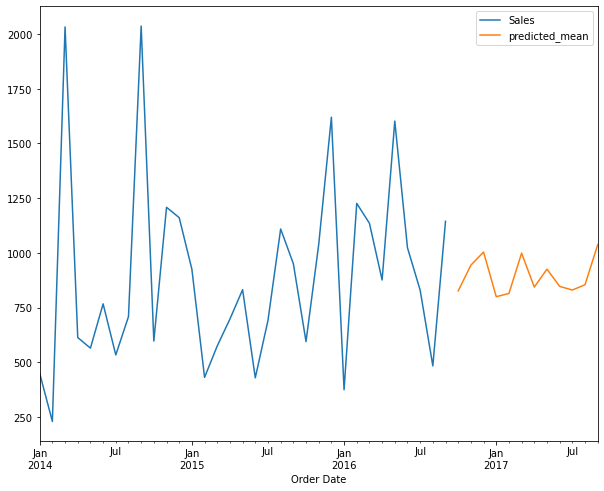

In [49]:
train['Sales'].plot(figsize=(10,8),legend=True)
fcast_off1.plot(legend=True)


plt.show()

------------------------------------------------------------------------------------------------------------------------------------------

## FURNITURE

In [50]:
fur

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,9963,CA-2015-168088,2015-03-19,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
9964,9965,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
9980,9981,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


In [51]:
office_supplies2 = fur[['Order Date','Sales']]
office_supplies2.head()

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840


In [52]:
office_supplies2 = office_supplies2.sort_values('Order Date')
office_supplies2 = office_supplies2.groupby('Order Date')['Sales'].sum().reset_index()
office_supplies2.tail(50)

,Order Date,Sales
839,2017-11-05,396.0240
840,2017-11-06,2681.3620
841,2017-11-07,623.3220
842,2017-11-08,274.2000
843,2017-11-09,883.0180
844,2017-11-10,1482.5200
845,2017-11-11,123.8400
846,2017-11-12,250.3040
847,2017-11-13,2765.6532
848,2017-11-14,321.5680


In [53]:
office_supplies2 = office_supplies2.set_index('Order Date')
office_supplies2

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,879.9390
...,...
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568


In [54]:
office_supplies2.shape

(889, 1)

In [55]:
office_monthly2 = office_supplies2['Sales'].resample('M').mean()

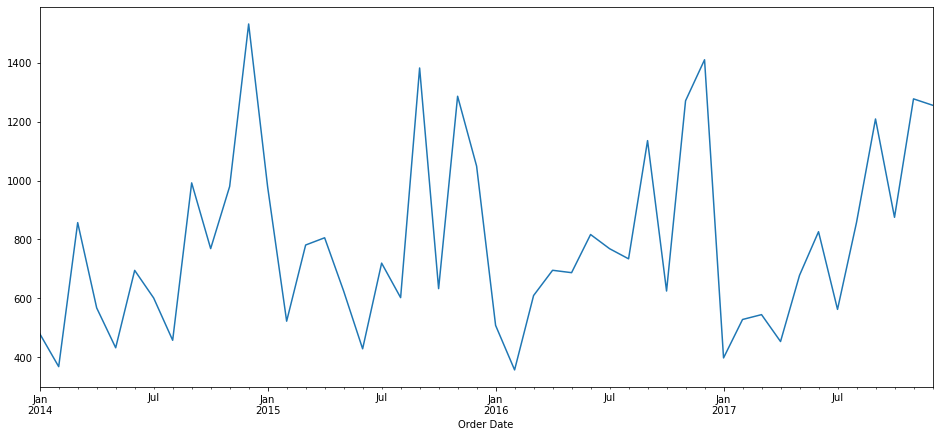

In [56]:
office_monthly2.plot(figsize = (16, 7))
plt.show()

High Sales for Furniture is in Dec 2015

In [57]:
office_monthly2=pd.DataFrame(office_monthly2)
office_monthly2.shape

(48, 1)

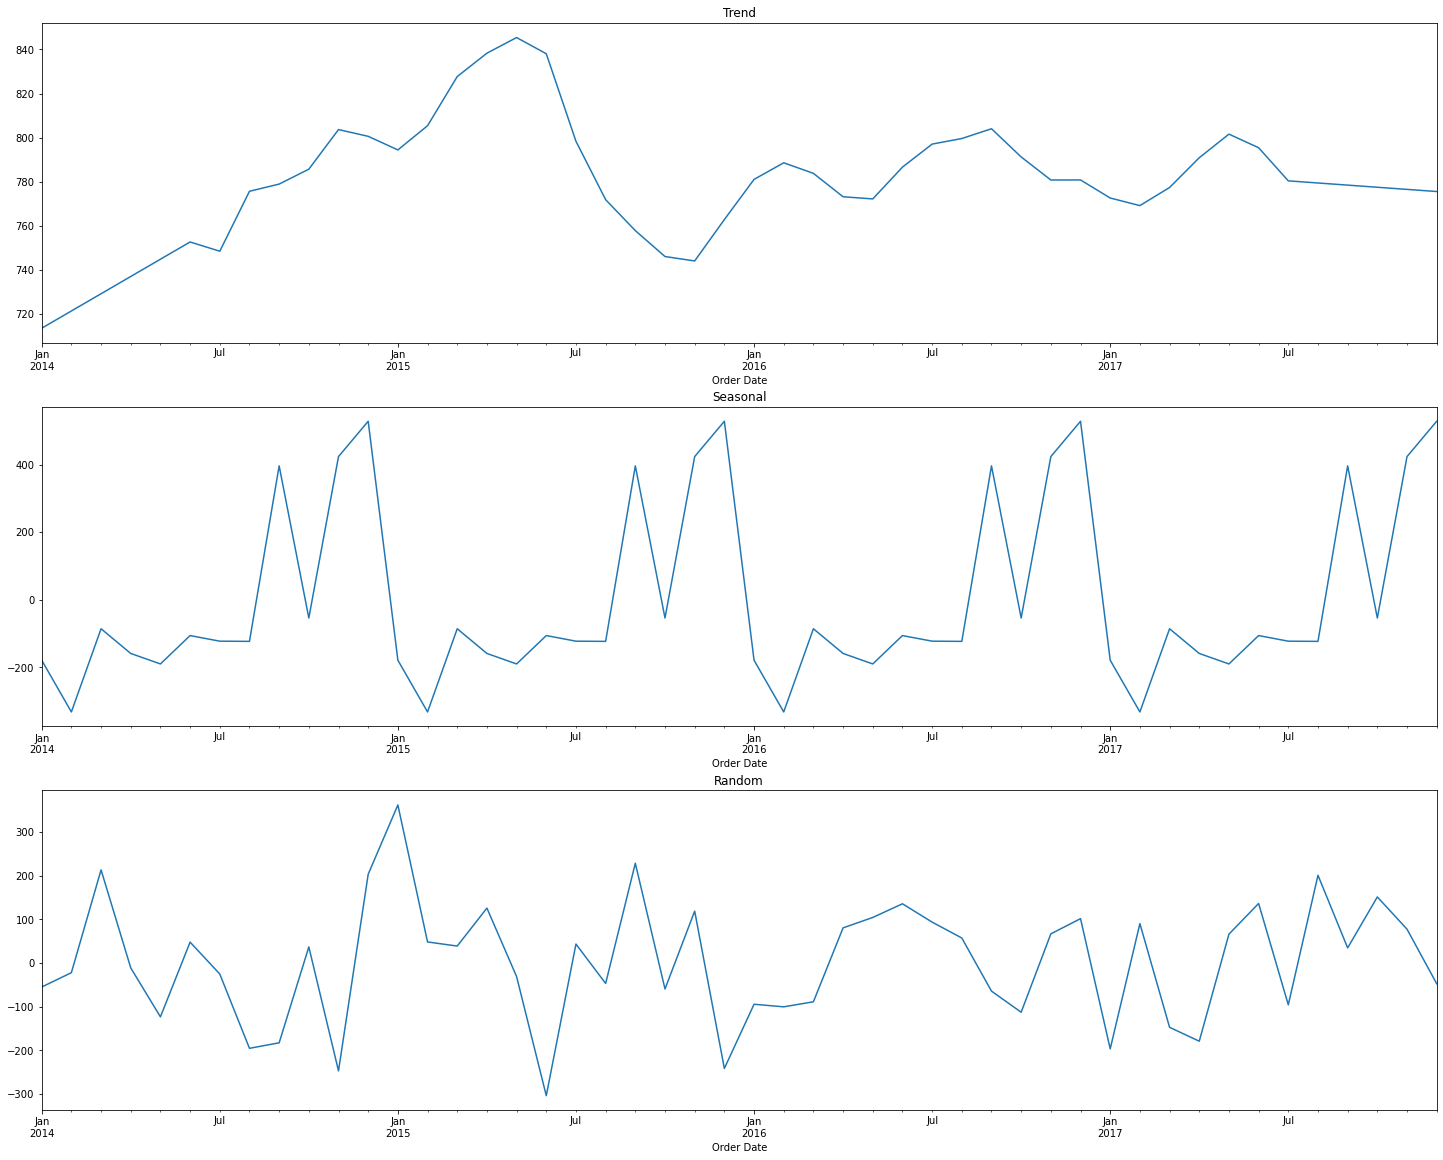

In [58]:
fig,ax = plt.subplots(3,1,figsize=(25,20))

result = seasonal_decompose(office_monthly2, period=12, extrapolate_trend='freq')

# result.trend.plot(figsize=(8,6),ax=ax[0])
result.trend.plot(ax=ax[0])
ax[0].set_title("Trend")

result.seasonal.plot(ax=ax[1])
ax[1].set_title("Seasonal")

result.resid.plot(ax=ax[2])
ax[2].set_title("Random")
plt.show()

There is Trend and Seasonality, so will move for SARIMA Model

### Stationarity Check

In [59]:
def checkStationarity(office_monthly2):
    pvalue = adfuller(office_monthly2)[1]

    if pvalue < 0.05:
        msg = "pvalue={}. Data is Stationary. Proceed to model building".format(pvalue)
    else:
        msg = "pvalue={}. Data is not Stationary. Make the data stationary before model building".format(pvalue)

    return(msg)

In [60]:
checkStationarity(office_monthly2)

'pvalue=9.16875665566545e-06. Data is Stationary. Proceed to model building'

### Plot ACF and PACF

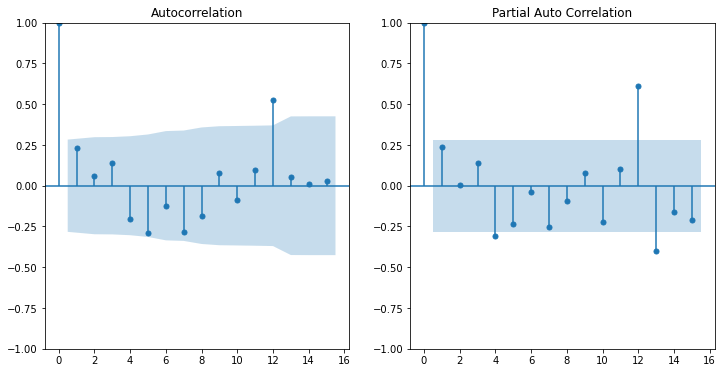

In [61]:
# ACF and PACF plots
ROWS = 1; COLS = 2
fig,ax = plt.subplots(ROWS,COLS,figsize=(12,6))
plot_acf(office_monthly2, lags=15, ax=ax[0])
plt.title("Auto Correlation")

plot_pacf(office_monthly2, lags=15, ax=ax[1])
plt.title("Partial Auto Correlation")

plt.show()

### Splitting

In [62]:
ss = int(0.70 * len(office_monthly2))
train = office_monthly2.iloc[:ss]
test = office_monthly2.iloc[ss:]
print("train = {}, test = {}".format(len(train), len(test)))

train = 33, test = 15


### Defining p and q values

In [63]:
m3 = auto_arima(office_monthly2,start_p=0,max_p=12,d=0, start_q=0,max_q=12, seasonal=True, trace=True)
print(m3.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=688.945, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=688.171, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=688.201, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=784.719, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=690.194, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=690.120, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=692.110, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=707.881, Time=0.06 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.584 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -341.085
Date:                Mon, 14 Nov 2022   AIC                            688.171
Time:                        10:57:43   BIC 

## Model

In [64]:
AIC2=[]
BIC2=[]
MSE2=[]
RMSE2=[]


start = len(train) 
end = len(train)+ 11
p=1; q=1
m3 = sm.tsa.statespace.SARIMAX(train['Sales'],order=(p,0,q),seasonal_order=(p,0,q,12)).fit()
fcast3=m3.fittedvalues
AIC2.append(m1.aic)
BIC2.append(m1.bic)
MSE2.append(mean_squared_error(train,fcast3))
RMSE2.append(np.sqrt(MSE2))


print(m3.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   33
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -230.789
Date:                            Mon, 14 Nov 2022   AIC                            471.579
Time:                                    10:57:44   BIC                            479.061
Sample:                                01-31-2014   HQIC                           474.096
                                     - 09-30-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9973      0.029     34.738      0.000       0.941       1.054
ma.L1         -0.9693      0.296   

In [65]:
# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(m3.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


In [66]:
fcast_off2=m3.predict(start,end,typ='levels')

In [134]:
train['Sales']

Order Date
2014-01-31     480.194231
2014-02-28     367.931600
2014-03-31     857.291529
2014-04-30     567.488357
2014-05-31     432.049188
2014-06-30     695.059242
2014-07-31     601.169500
2014-08-31     457.521656
2014-09-30     992.353367
2014-10-31     769.015437
2014-11-30     980.221486
2014-12-31    1532.298325
2015-01-31     978.328467
2015-02-28     522.395667
2015-03-31     781.236437
2015-04-30     805.822962
2015-05-31     624.996700
2015-06-30     428.565500
2015-07-31     719.706316
2015-08-31     602.412012
2015-09-30    1382.790684
2015-10-31     632.980184
2015-11-30    1286.701354
2015-12-31    1049.355418
2016-01-31     508.182867
2016-02-29     356.868273
2016-03-31     609.575810
2016-04-30     695.373158
2016-05-31     687.265227
2016-06-30     816.910750
2016-07-31     768.736412
2016-08-31     734.307782
2016-09-30    1135.953371
Freq: M, Name: Sales, dtype: float64

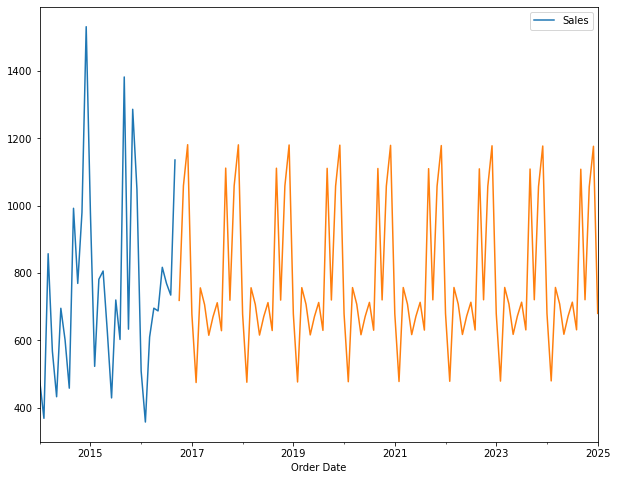

In [179]:
pred_uc = m3.get_forecast(steps = 100)
train['Sales'].plot(figsize=(10,8),legend=True)
pred_uc.predicted_mean.plot( label ='Forecast')


plt.show()

In [183]:
pred_uc.predicted_mean[0]

718.5893741734283

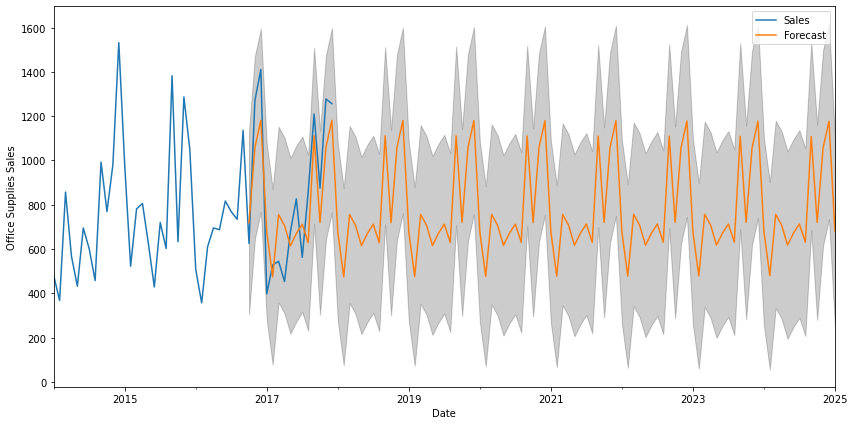

In [131]:
pred_uc = m3.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()

ax = office_monthly2.plot(label = 'observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax = ax, label ='Forecast')
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],
               color = 'k',
               alpha = .2)

ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies Sales')
plt.legend()
plt.show()

In [98]:
#pred_ci

,lower Sales,upper Sales
2016-10-31,305.902231,1131.276517
2016-11-30,646.509606,1471.985620
2016-12-31,768.664299,1594.236916
2017-01-31,280.807268,1074.125996
2017-02-28,77.654702,871.061624
...,...,...
2024-09-30,684.891168,1532.039041
2024-10-31,279.221207,1161.765678
2024-11-30,614.925988,1497.650527
2024-12-31,735.275771,1618.175215


## Comparison

In [68]:
Supplies = pd.DataFrame({ 'MSE':[MSE,MSE1,MSE2], 'RMSE':[RMSE,RMSE1,RMSE2]}, index = ['OFFICE','TECHNOLOGY','FURNITURE'])
Supplies

,MSE,RMSE
OFFICE,[50112.125983484875],[[223.85737866660745]]
TECHNOLOGY,[241698.728880824],[[491.6286493694443]]
FURNITURE,[78742.29957924338],[[280.61058351253143]]


In [69]:
office_monthly2.values

array([[ 480.19423077],
       [ 367.9316    ],
       [ 857.29152941],
       [ 567.48835714],
       [ 432.0491875 ],
       [ 695.05924211],
       [ 601.1695    ],
       [ 457.52165625],
       [ 992.35336667],
       [ 769.0154375 ],
       [ 980.22148636],
       [1532.298325  ],
       [ 978.32846667],
       [ 522.39566667],
       [ 781.2364375 ],
       [ 805.82296154],
       [ 624.9967    ],
       [ 428.5655    ],
       [ 719.70631579],
       [ 602.4120125 ],
       [1382.79068421],
       [ 632.98018421],
       [1286.70135417],
       [1049.35541818],
       [ 508.18286667],
       [ 356.86827273],
       [ 609.57580952],
       [ 695.37315789],
       [ 687.26522727],
       [ 816.91075   ],
       [ 768.73641176],
       [ 734.30778235],
       [1135.95337083],
       [ 624.87247368],
       [1271.345152  ],
       [1410.71980769],
       [ 397.60213333],
       [ 528.1798    ],
       [ 544.67224   ],
       [ 453.297905  ],
       [ 678.302328  ],
       [ 826.460

In [70]:
#furniture = pd.DataFrame({'Order Date':office_monthly2.index, 'Furniture_Sales':office_monthly2['Sales']})
#furniture=furniture.reset_index(drop=True)


In [71]:
furniture = pd.DataFrame({'Order Date':office_monthly2.index, 'Furniture_Sales':office_monthly2['Sales']})
furniture=furniture.reset_index(drop=True)
office = pd.DataFrame({'Order Date': office_monthly.index, 'Office_Sales': office_monthly['Sales']})
office=office.reset_index(drop=True)
technology= pd.DataFrame({'Order Date': office_monthly1.index, 'Technology_Sales': office_monthly1['Sales']})
technology=technology.reset_index(drop=True)


Superstore = pd.merge(furniture,office, on = 'Order Date',how = 'inner')

Superstore.head()

,Order Date,Furniture_Sales,Office_Sales
0,2014-01-31,480.194231,285.357647
1,2014-02-28,367.931600,63.042588
2,2014-03-31,857.291529,391.176318
3,2014-04-30,567.488357,464.794750
4,2014-05-31,432.049188,324.346545


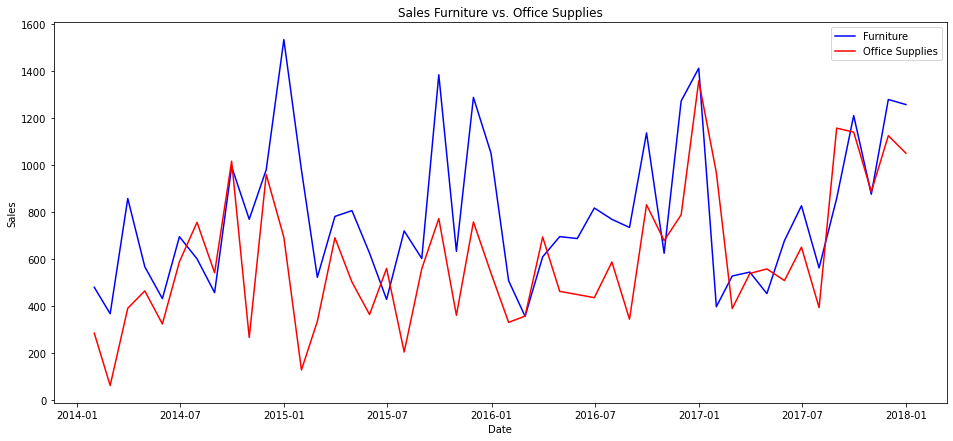

In [72]:
plt.figure(figsize = (16, 7))
plt.plot(Superstore['Order Date'], Superstore['Furniture_Sales'], 'b-', label = 'Furniture')
plt.plot(Superstore['Order Date'], Superstore['Office_Sales'], 'r-', label = 'Office Supplies')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Furniture vs. Office Supplies')
plt.legend()
plt.show()

In [73]:
Superstore1 = pd.merge(furniture,technology, on = 'Order Date',how = 'inner')
#Superstore1 

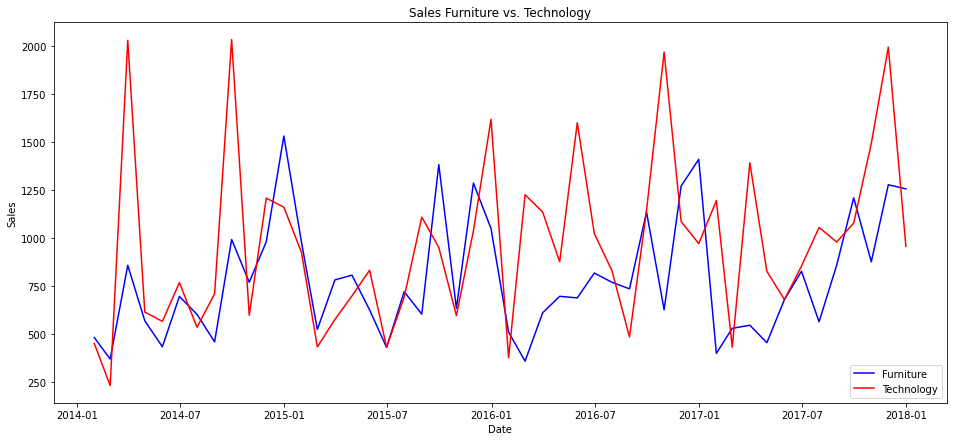

In [74]:
plt.figure(figsize = (16, 7))
plt.plot(Superstore1['Order Date'], Superstore1['Furniture_Sales'], 'b-', label = 'Furniture')

plt.plot(Superstore1['Order Date'], Superstore1['Technology_Sales'], 'r-', label = 'Technology')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Furniture vs. Technology')
plt.legend()
plt.show()

Considering Actual Sales \
It can be concluded that Furniture has High Sales then Office Supplies(for common order dates) \
Also, It has low Sales than Technology(for common order dates)

## Future Pred

In [75]:
fcast_off2.values

array([ 718.58937417, 1059.24761294, 1181.45060785,  677.46663203,
        474.35816254,  755.76309038,  706.08766022,  614.85497261,
        669.7926195 ,  711.54990876,  628.39102216, 1111.83120531])

In [76]:
furniture = pd.DataFrame({'Order Date':fcast_off2.index, 'Furniture_Sales_Future_Pred':fcast_off2.values})
#furniture=furniture.reset_index(drop=True)
office = pd.DataFrame({'Order Date': fcast_off.index, 'Office_Sales_Future_Pred': fcast_off.values})
#office=office.reset_index(drop=True)
technology= pd.DataFrame({'Order Date': fcast_off1.index, 'Technology_Sales_Future_Pred': fcast_off1.values})
#technology=technology.reset_index(drop=True)


Superstore_fut = pd.merge(furniture,office, on = 'Order Date',how = 'inner')

Superstore_fut.head()

,Order Date,Furniture_Sales_Future_Pred,Office_Sales_Future_Pred
0,2016-10-31,718.589374,378.559813
1,2016-11-30,1059.247613,736.360853
2,2016-12-31,1181.450608,569.267548
3,2017-01-31,677.466632,328.570250
4,2017-02-28,474.358163,355.659904


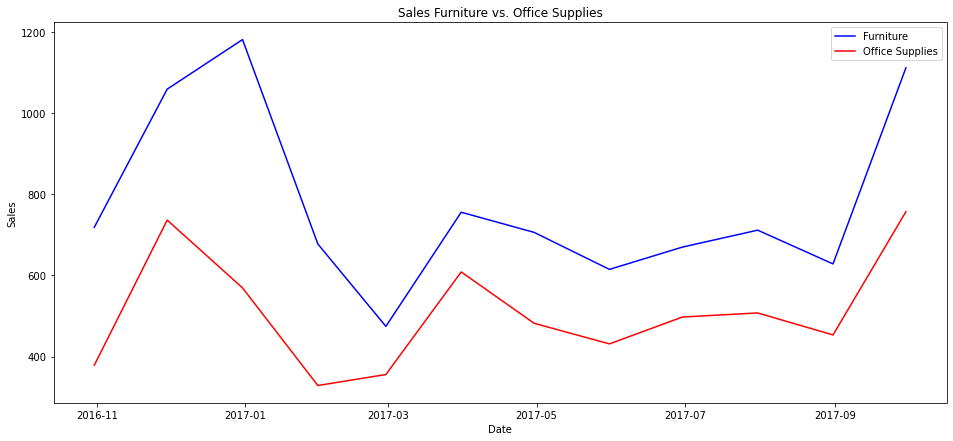

In [77]:
plt.figure(figsize = (16, 7))
plt.plot(Superstore_fut['Order Date'], Superstore_fut['Furniture_Sales_Future_Pred'], 'b-', label = 'Furniture')
plt.plot(Superstore_fut['Order Date'], Superstore_fut['Office_Sales_Future_Pred'], 'r-', label = 'Office Supplies')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Furniture vs. Office Supplies')
plt.legend()
plt.show()

In [78]:
Superstore_fut1 = pd.merge(furniture,technology, on = 'Order Date',how = 'inner')

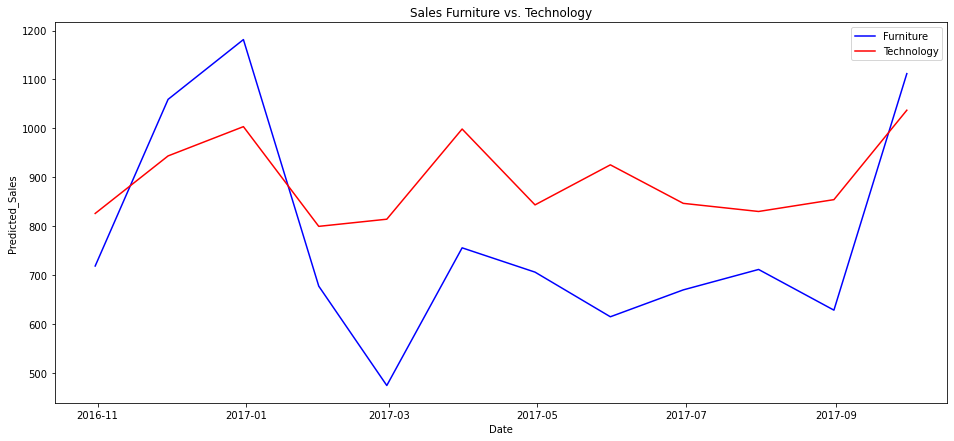

In [79]:
plt.figure(figsize = (16, 7))
plt.plot(Superstore_fut1['Order Date'], Superstore_fut1['Furniture_Sales_Future_Pred'], 'b-', label = 'Furniture')
plt.plot(Superstore_fut1['Order Date'], Superstore_fut1['Technology_Sales_Future_Pred'], 'r-', label = 'Technology')
plt.xlabel('Date')
plt.ylabel('Predicted_Sales')
plt.title('Sales Furniture vs. Technology')
plt.legend()
plt.show()

Considering Future Predicted Sales \
It can be concluded that Furniture has High Sales then Office Supplies(for common order dates)\
Also, It has low Sales than Technology(for common order dates)